In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pandas import Series
from numpy.random import randn

In [2]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1hGMPRpSmEEGzBhar7j2gVmgp05H_-EJL'

In [0]:
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('affairs.csv')  
data = pd.read_csv('affairs.csv')

In [5]:
from sklearn.utils import shuffle 
data = shuffle(data)
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
288,5.0,37.0,13.0,2.0,3.0,14.0,4.0,3.0,0.269231,1
5620,4.0,27.0,6.0,0.0,2.0,16.0,3.0,6.0,0.000000,0
1716,2.0,32.0,9.0,0.0,2.0,16.0,3.0,2.0,1.361111,1
366,2.0,37.0,16.5,3.0,2.0,12.0,2.0,4.0,0.727273,1
5587,4.0,22.0,2.5,0.0,3.0,16.0,4.0,1.0,0.000000,0


In [0]:
train,cv,test = np.split(data,[int(0.6*len(data)),int(0.8*len(data))])

In [0]:
#Features:
feature = train['age']
# feature = feature/max(feature)
label = train['affair']
cvFeature = cv['age']
# cvFeature = cvFeature/max(cvFeature)
cvLabel = cv['affair']
testFeature = test['age']
# testFeature = testFeature/max(testFeature)
testLabel = test['affair']

In [0]:
weights = 1

def sigmoid(weights,x):
    return (1/(1+np.exp(-(weights*x))))

def cost(weights,x,y):
    return np.mean((sigmoid(x,weights)-y)**2)

def derivative(weights,x,y):
    return np.mean((sigmoid(weights,x)-y)*x)

In [0]:
def gradientDescent(iterations,learningRate):
    global feature,label
    weightsOld = 1
    weightsNew = 0
    for i in range(0,iterations):
        weightsNew = weightsOld - learningRate*derivative(weightsOld,feature,label)
#         print("weightsOld:",weightsOld,"weightsNew:",weightsNew)
#         print("Subtract",(weightsOld-weightsNew))
        weightsOld = weightsNew
    return weightsOld

def test(weights,x,y):
    mse = cost(weights,x,y)
    accuracy = 100 - ((mse/np.mean(x))*100)
    print("Cost",mse)
    print("DataMean",np.mean(x))
    print("Accuracy",accuracy,"%")

In [10]:
def testDiscrete(weights,x,y):
    answers = []
    correct = 0
    for i in range(0,len(x)):
        pro = cost(weights,x.iloc[i],y.iloc[i])
        print(pro)
        if(pro>0.5 ):
            answers.append(1)
        else:
            answers.append(0)
    for i in range(0,len(answers)):
        if(answers[i]==testLabel.iloc[i]):
            correct = correct+1
            
    print("Answers",answers)
    print("Accuracy:",((correct/len(answers))*100))

#Learning Variables:
iterations = 500
lr = 0.001
learnedweightss = gradientDescent(iterations,lr)

#Testing:
print("Training Accuracy")
test(learnedweightss,feature,label)
print("----------------------")
print("CrossValidation Accuracy")
test(learnedweightss,cvFeature,cvLabel)
print("----------------------")
print("Testing Accuracy")
test(learnedweightss,testFeature,testLabel)
# print("Result Discrete Testing")
# testDiscrete(learnedweightss,testFeature,testLabel)

Training Accuracy
Cost 0.22563833217148363
DataMean 29.105655930871954
Accuracy 99.22476121923728 %
----------------------
CrossValidation Accuracy
Cost 0.2208906212703555
DataMean 29.139434406912805
Accuracy 99.24195295562102 %
----------------------
Testing Accuracy
Cost 0.22650047006702656
DataMean 28.95800627943485
Accuracy 99.21783126959303 %


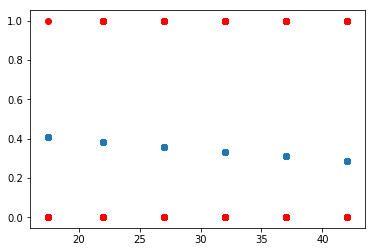

In [11]:
import matplotlib.pyplot as plt
#Plotting Sigmoid:
sig = []

for i in range(0,len(testFeature)):
    sig.append(1/(1+np.exp((-1)*(testFeature.iloc[i]**1)*learnedweightss)))

plt.scatter(testFeature,sig)
plt.scatter(testFeature,testLabel,color='red')  
plt.show()